In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5  # to avoid log(0)
    cost = -(1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon))
    return cost

In [4]:
# Gradient Descent for Logistic Regression
def logistic_regression(X, y, lr=0.1, iterations=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))

    for i in range(iterations):
        z = X.dot(weights)
        h = sigmoid(z)
        gradient = X.T.dot(h - y) / m
        weights -= lr * gradient

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {compute_cost(X, y, weights)[0]}")

    return weights

In [5]:
# Generate toy data for binary classification
np.random.seed(0)
num_points = 100
X = np.random.randn(num_points, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)

In [6]:
# Add bias term
X_b = np.c_[np.ones((num_points, 1)), X]

# Train model
weights = logistic_regression(X_b, y, lr=0.1, iterations=1000)
print("Final weights:", weights.ravel())

Iteration 0, Cost: [0.67695673]
Iteration 100, Cost: [0.27270389]
Iteration 200, Cost: [0.20446878]
Iteration 300, Cost: [0.17224919]
Iteration 400, Cost: [0.15257365]
Iteration 500, Cost: [0.13896523]
Iteration 600, Cost: [0.12882576]
Iteration 700, Cost: [0.12088612]
Iteration 800, Cost: [0.11444405]
Iteration 900, Cost: [0.10907569]
Final weights: [-0.02964354  3.95411916  3.68371913]


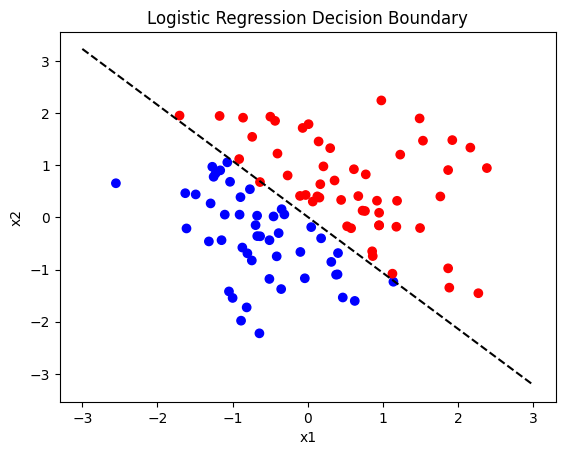

In [7]:
# Plot decision boundary
x1 = np.linspace(-3, 3, 100)
x2 = -(weights[0] + weights[1] * x1) / weights[2]

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
plt.plot(x1, x2, 'k--')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundary")
plt.show()